# Students grades for Portuguese Course

### Importing Libraries

In [21]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Now its time to the load datasat

In [22]:
data=pd.read_csv('student-por.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Exploring the dataset-- Now we'll try to get more and more inforfation about the dataset

In [23]:
#Getting information about datatyes of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [24]:
# Showing summary of data

data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [25]:
# data (rows,columns)
data.shape

(649, 33)

In [26]:
#checking is there null value assigned to any feature
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We can see that there is no value in the whole dataset which assigend to be 0,so we can perform ML models easily

array([[<AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='studytime', ylabel='G3'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G3'>,
        <AxesSubplot:xlabel='failures', ylabel='G3'>,
        <AxesSubplot:xlabel='Dalc', ylabel='G3'>,
        <AxesSubplot:xlabel='Walc', ylabel='G3'>],
       [<AxesSubplot:xlabel='G3', ylabel='studytime'>,
        <AxesSubplot:xlabel='studytime', ylabel='studytime'>,
        <AxesSubplot:xlabel='Fedu', ylabel='studytime'>,
        <AxesSubplot:xlabel='failures', ylabel='studytime'>,
        <AxesSubplot:xlabel='Dalc', ylabel='studytime'>,
        <AxesSubplot:xlabel='Walc', ylabel='studytime'>],
       [<AxesSubplot:xlabel='G3', ylabel='Fedu'>,
        <AxesSubplot:xlabel='studytime', ylabel='Fedu'>,
        <AxesSubplot:xlabel='Fedu', ylabel='Fedu'>,
        <AxesSubplot:xlabel='failures', ylabel='Fedu'>,
        <AxesSubplot:xlabel='Dalc', ylabel='Fedu'>,
        <AxesSubplot:xlabel='Walc', ylabel='Fedu'>],
       [<AxesSubplot:x

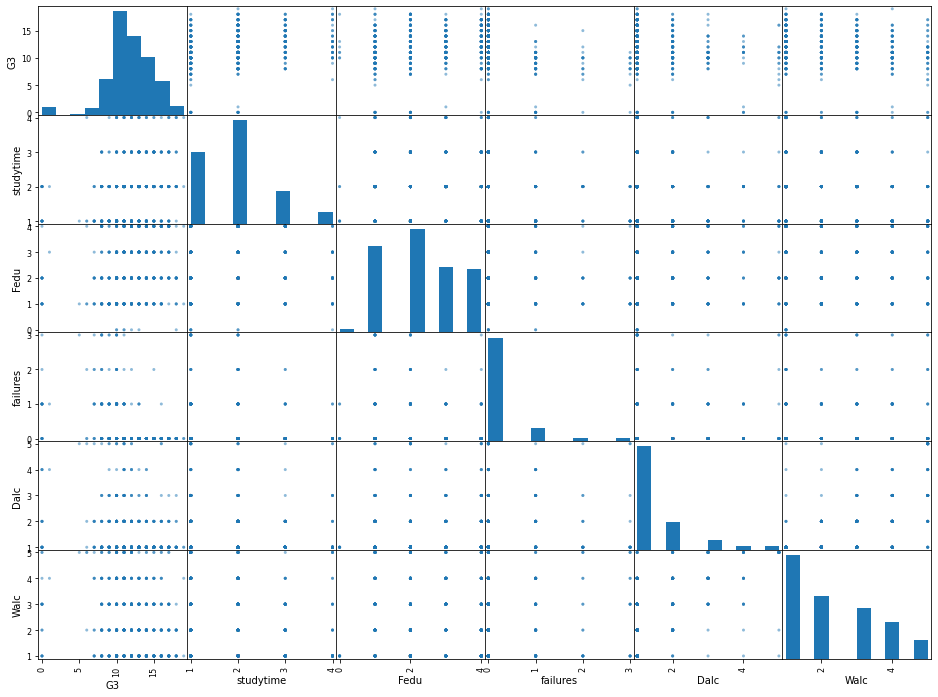

In [27]:
attributes = ["G3", "studytime", "Fedu", "failures", "Dalc", "Walc"] 

scatter_matrix(data[attributes], figsize=(16, 12))

In [28]:
corr_matrix = data.corr()

corr_matrix["absences"].sort_values(ascending=False)

absences      1.000000
Dalc          0.172952
Walc          0.156373
age           0.149998
failures      0.122779
goout         0.085374
Fedu          0.029859
traveltime   -0.008149
Medu         -0.008577
freetime     -0.018716
health       -0.030235
famrel       -0.089534
G3           -0.091379
studytime    -0.118389
G2           -0.124745
G1           -0.147149
Name: absences, dtype: float64

Here we can see there is a strong relation of  G3 not only with G1 and G2 but also withDalc,Walc,age,failures,goout,Fedu


### Choosing some useful feature from the given dataset

In [34]:
features_chosen = ['studytime', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime',  'Medu', 'Fedu', 
                   'sex', 'school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                   'higher', 'internet', 'G1', 'G2', 'G3']

newdata = data[features_chosen].copy()
newdata.head()

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,sex,school,...,Mjob,Fjob,reason,guardian,schoolsup,higher,internet,G1,G2,G3
0,2,0,1,1,2,3,4,4,F,GP,...,at_home,teacher,course,mother,yes,yes,no,0,11,11
1,2,0,1,1,1,3,1,1,F,GP,...,at_home,other,course,father,no,yes,yes,9,11,11
2,2,0,2,3,1,3,1,1,F,GP,...,at_home,other,other,mother,yes,yes,yes,12,13,12
3,3,0,1,1,1,2,4,2,F,GP,...,health,services,home,mother,no,yes,yes,14,14,14
4,2,0,1,2,1,3,3,3,F,GP,...,other,other,home,father,no,yes,no,11,13,13


### Now taking mean of G1,G2,G3


In [36]:
# mean
newdata["G"]=(newdata["G1"]+newdata["G2"]+newdata["G3"])/3
# dropping initial grades and leaving mean 
newdata.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

### converting catogorical values to numerical values

In [37]:
features_cat = ['sex','school','address','Mjob','Fjob','reason','schoolsup','guardian','higher','internet']

newdata_cat = pd.get_dummies(student_reduced, columns = features_cat)
newdata_cat

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,G,sex_F,...,reason_reputation,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes
0,2,0,1,1,2,3,4,4,7.333333,1,...,0,0,1,0,1,0,0,1,1,0
1,2,0,1,1,1,3,1,1,10.333333,1,...,0,1,0,1,0,0,0,1,0,1
2,2,0,2,3,1,3,1,1,12.333333,1,...,0,0,1,0,1,0,0,1,0,1
3,3,0,1,1,1,2,4,2,14.000000,1,...,0,1,0,0,1,0,0,1,0,1
4,2,0,1,2,1,3,3,3,12.333333,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,1,1,2,1,4,2,3,10.333333,1,...,0,1,0,0,1,0,0,1,0,1
645,2,0,1,1,1,3,3,1,15.333333,1,...,0,1,0,0,1,0,0,1,0,1
646,2,0,1,1,2,1,1,1,10.666667,1,...,0,1,0,0,1,0,0,1,1,0
647,1,0,3,4,2,4,3,1,10.000000,0,...,0,1,0,0,1,0,0,1,0,1


get_dummies() method of pandas is used to assign numerical values to the catogorical values...
It will assign 1 for true and 0 for false

# Till now our preprcessing has been done we'll see visualisation in next notebook
